In [1]:
import numpy as np
import pandas as pd
import urllib
import os
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [2]:
download_path=r"https://raw.githubusercontent.com/Somesh140/Laptop_price_prediction/main/Data/laptop_data.csv"

In [3]:
root_dir=os.getcwd()
data_dir=os.path.join(root_dir,"Data")

In [4]:
file_name=os.path.basename(download_path)
file_path=os.path.join(data_dir,file_name)

In [5]:
os.makedirs(data_dir,exist_ok=True)

In [6]:
urllib.request.urlretrieve(download_path,file_path)

('C:\\Users\\Dell\\Data\\laptop_data.csv',
 <http.client.HTTPMessage at 0x230739f4dd0>)

In [7]:
df=pd.read_csv(file_path)
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
df.shape

(1303, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [10]:
#checking duplicate rows
df.duplicated().sum()

0

In [11]:
#checking null values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [12]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [13]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [14]:
#Removing GB from RAM column and kg from Weight column
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [15]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [16]:
#Changing datatype of RAM and Weight columns
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [18]:
import seaborn as sns
sns.set_style("darkgrid")

C:\Users\Dell\AppData\Local\Temp\ipykernel_13068\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

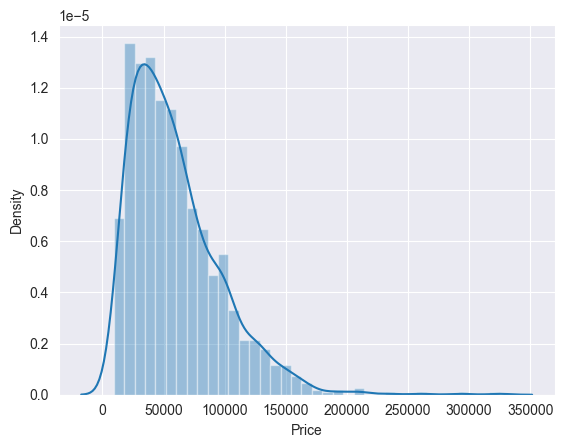

In [19]:
sns.distplot(df['Price'])

<Axes: >

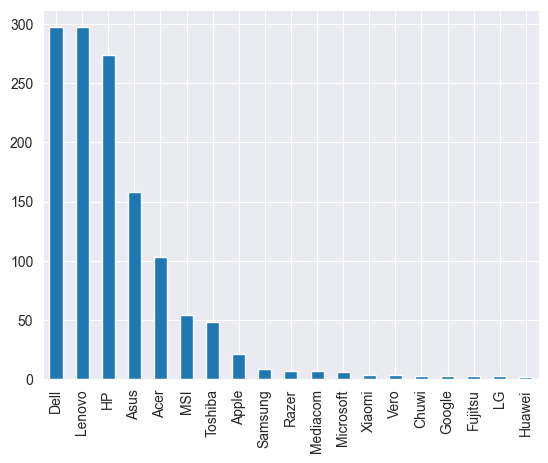

In [20]:
df['Company'].value_counts().plot(kind='bar')

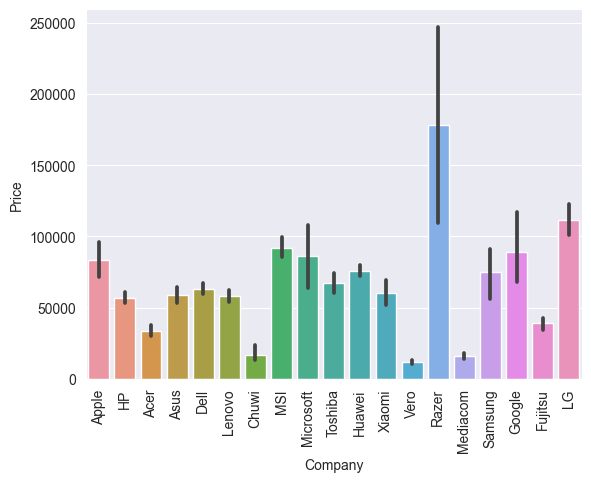

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x=df['Company'], y=df['Price'])

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()


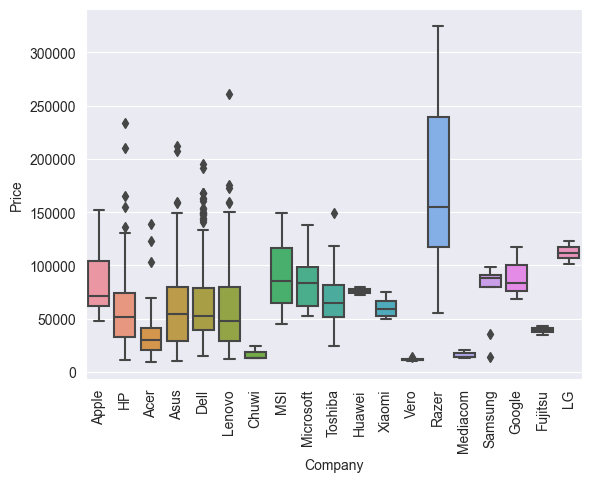

In [22]:
sns.boxplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

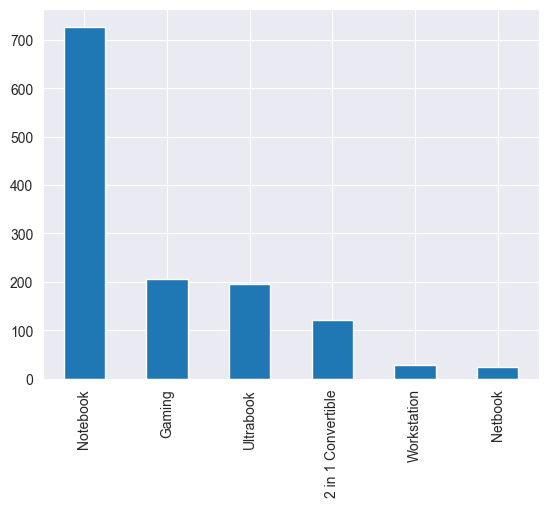

In [23]:
df['TypeName'].value_counts().plot(kind='bar')

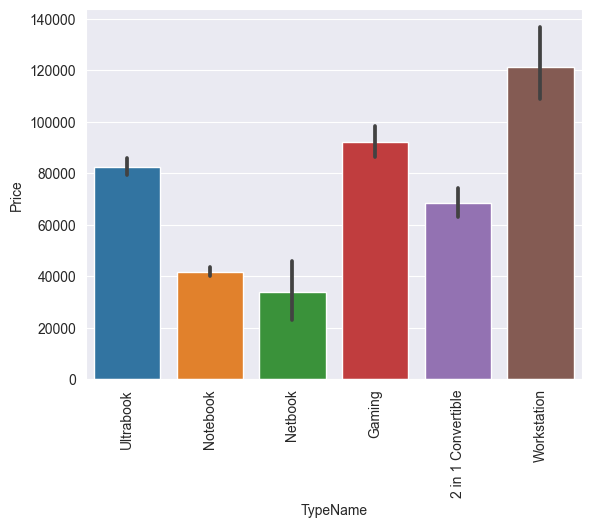

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a barplot
sns.barplot(x=df['TypeName'], y=df['Price'])

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()


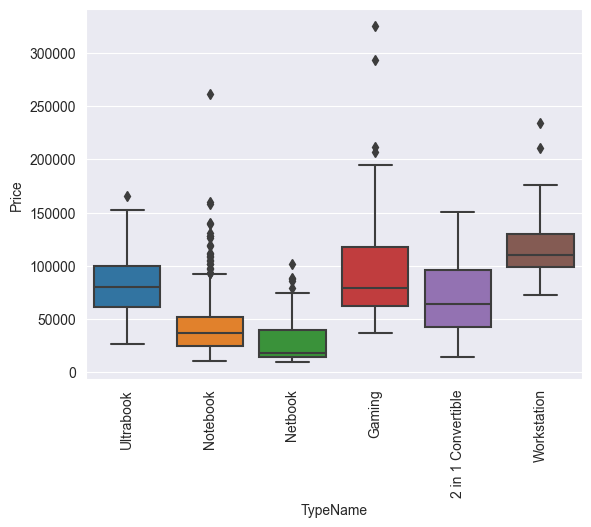

In [25]:
sns.boxplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13068\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

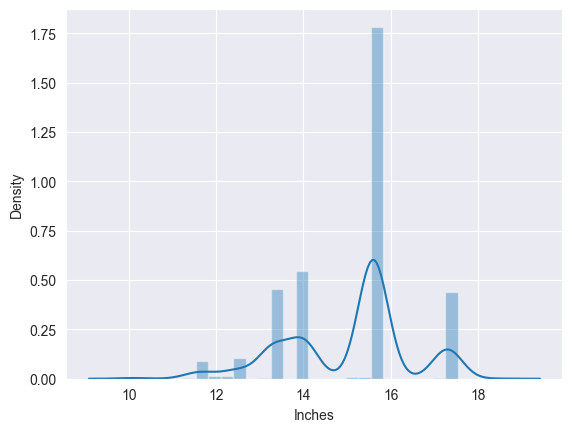

In [26]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

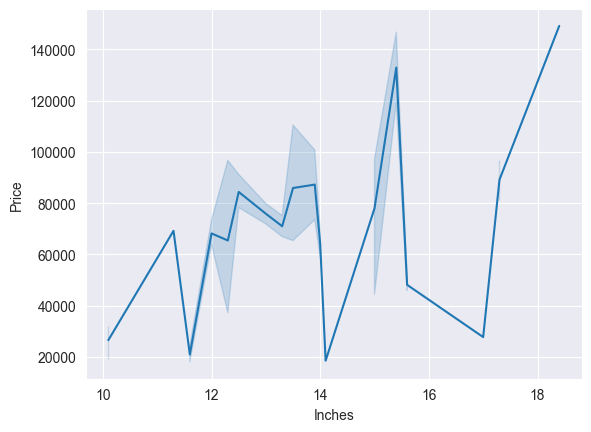

In [27]:
sns.lineplot(x=df['Inches'],y=df['Price'])

<Axes: xlabel='Inches', ylabel='Price'>

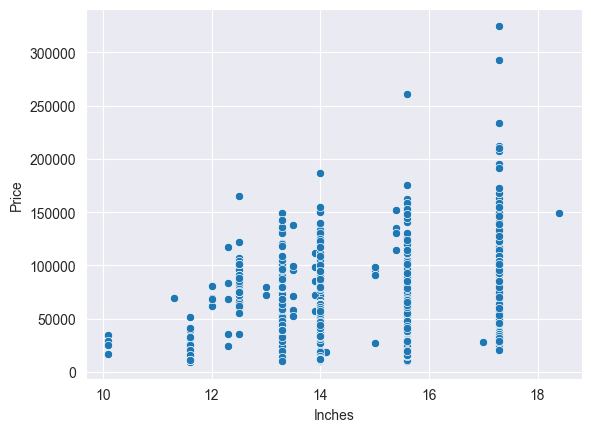

In [28]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [29]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [30]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [31]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1108,HP,Notebook,15.6,Full HD 1920x1080,AMD A6-Series 9220 2.5GHz,4,1TB HDD,AMD Radeon R4,Windows 10,2.10,21205.44,0
1245,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,85248.00,0
1060,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.04,57009.60,0
142,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.40,46300.32,0
1225,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,2.65,16463.52,0
864,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29,119347.20,1
198,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.35,73473.12,0
492,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99,71928.00,0
901,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 256GB SSD,Nvidia GeForce GTX 980M,Windows 10,3.58,68145.12,0
63,Asus,Notebook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.40,50136.48,0


<Axes: >

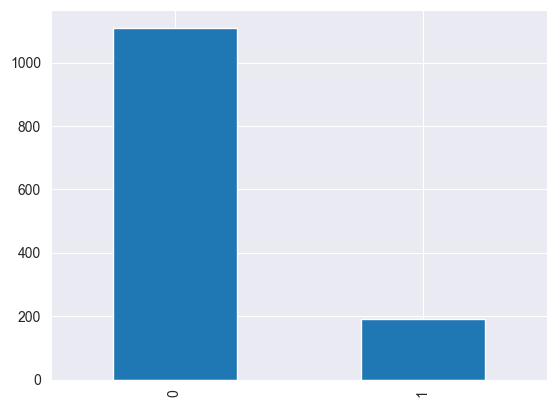

In [32]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

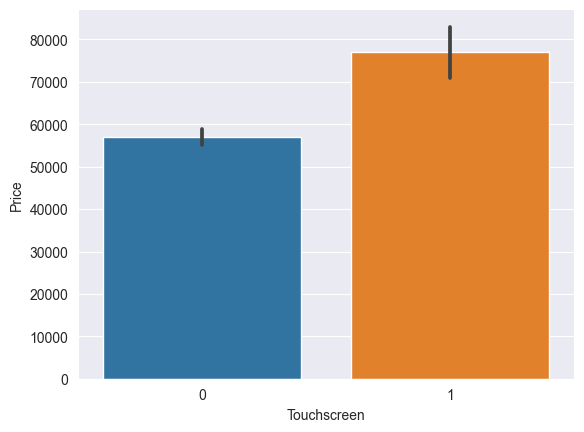

In [33]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

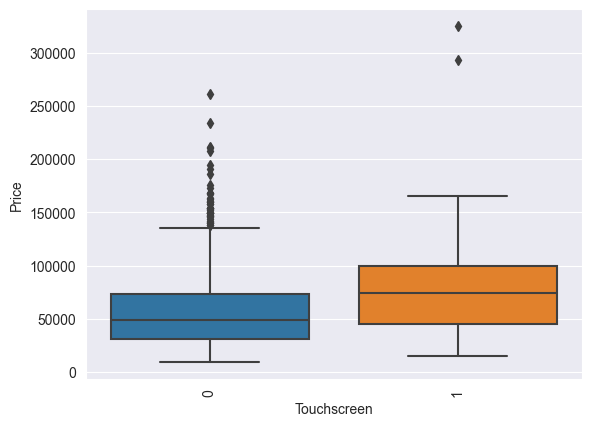

In [34]:
sns.boxplot(x=df['Touchscreen'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [35]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: >

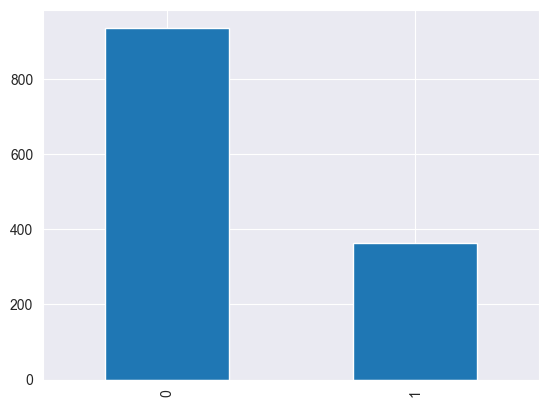

In [37]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

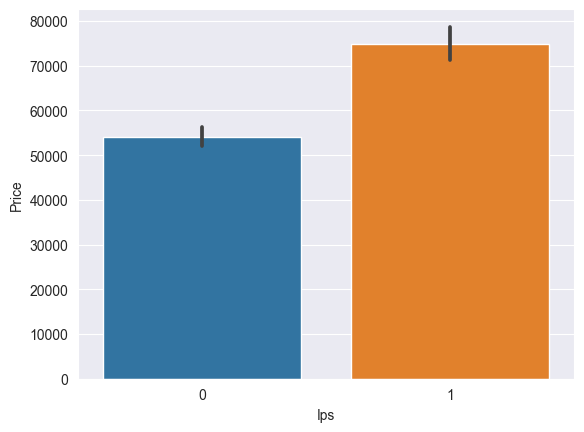

In [38]:

sns.barplot(x=df['Ips'],y=df['Price'])

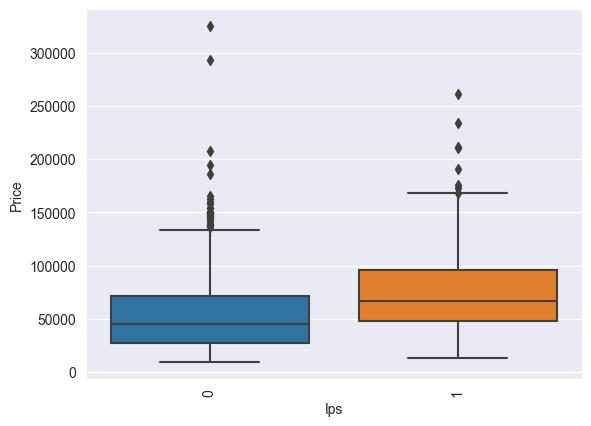

In [39]:
sns.boxplot(x=df['Ips'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
new_df=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [41]:
new_df.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [42]:
df['X_res'] = new_df[0]
df['Y_res'] = new_df[1]

In [43]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
632,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,256GB SSD,Intel UHD Graphics 620,Windows 10,1.80,44169.120,0,0,Full HD 1920,1080
587,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12,256GB SSD,Intel HD Graphics 520,Windows 10,1.40,89137.440,0,1,IPS Panel Full HD 1920,1080
727,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.71,34578.720,1,0,Full HD / Touchscreen 1920,1080
997,Acer,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,500GB HDD,Intel HD Graphics 505,Windows 10,2.40,20246.400,0,0,1366,768
384,Asus,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.10,93181.392,1,0,Full HD / Touchscreen 1920,1080
318,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,52214.400,0,0,Full HD 1920,1080
282,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.50,44169.120,0,1,IPS Panel Full HD 1920,1080
874,Samsung,Ultrabook,15.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.23,98514.720,0,0,Full HD 1920,1080
122,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 940MX,No OS,2.20,33513.120,0,0,Full HD 1920,1080
616,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD,AMD Radeon R5 M420,Linux,2.18,30316.320,0,0,Full HD 1920,1080


In [44]:
df['X_res']=df['X_res'].str.split().apply(lambda x:x[-1])

In [45]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [46]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

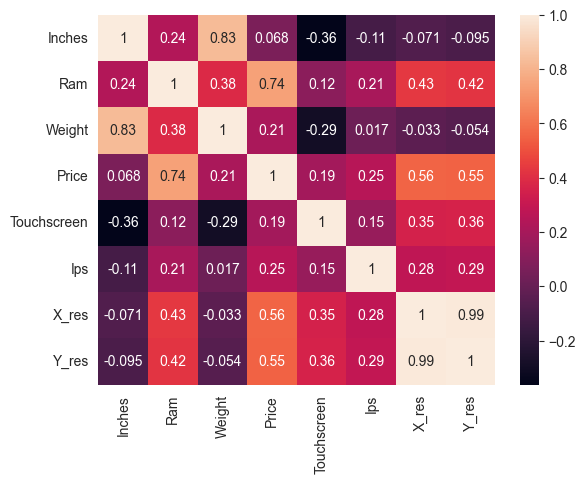

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include='number')

# Create a heatmap of correlations
sns.heatmap(numeric_df.corr(), annot=True)

# Show the plot
plt.show()


In [48]:
# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number])
corr = numeric_columns.corr()['Price']
from sklearn.preprocessing import LabelEncoder

# Convert non-numeric columns to numeric values using label encoding
label_encoder = LabelEncoder()
df_encoded = df.copy()
for col in df.columns:
    if df[col].dtype == 'object':
        df_encoded[col] = label_encoder.fit_transform(df[col])

# Perform correlation
corr = df_encoded.corr()['Price']


In [49]:
df['ppi']=(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [50]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [51]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [52]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [53]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [54]:
df['Cpu Name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [55]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [56]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

<Axes: >

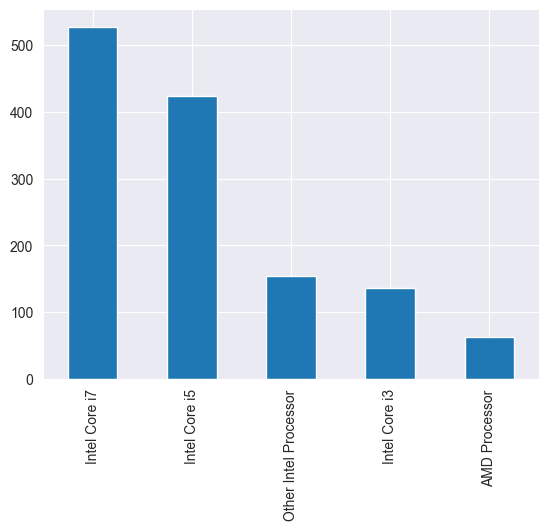

In [57]:
df['Cpu brand'].value_counts().plot(kind='bar')

In [58]:
order=list(df['Cpu brand'].value_counts().index)

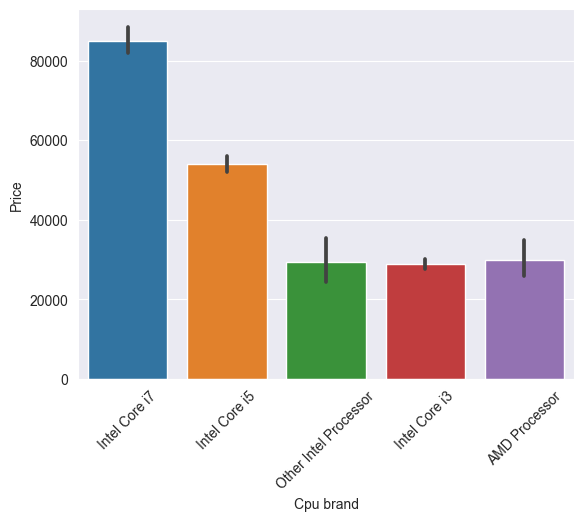

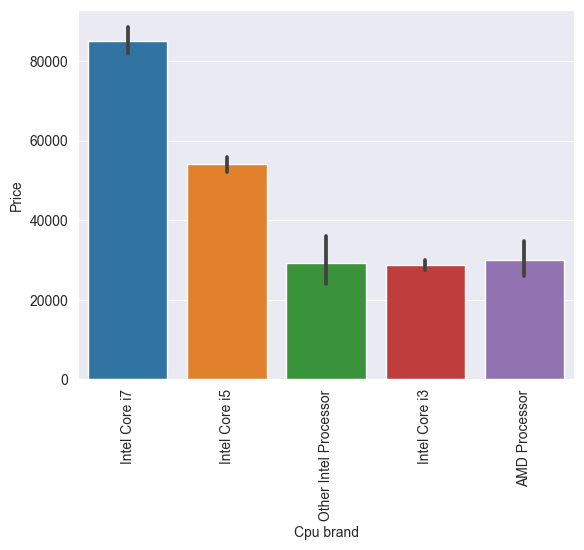

In [59]:
sns.barplot(x=df['Cpu brand'], y=df['Price'], order=order)
plt.xticks(rotation=45)  # Update the rotation value to 45
plt.show()
sns.barplot(x=df['Cpu brand'], y=df['Price'], order=order)
plt.xticks(rotation='vertical')  # Update the rotation value to 'vertical'
plt.show()


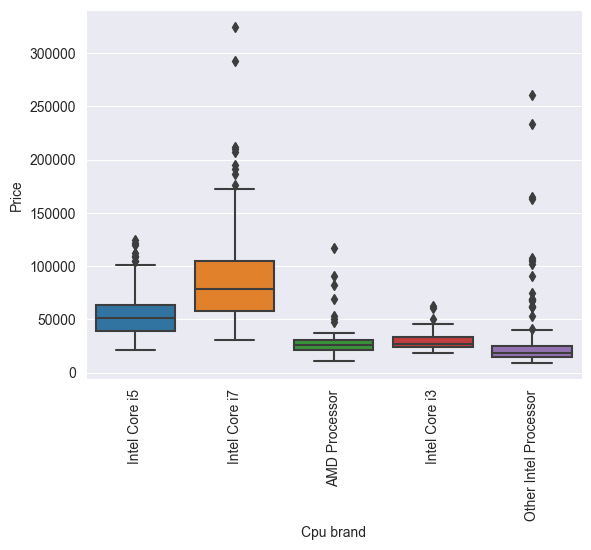

In [60]:
sns.boxplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [61]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [62]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [63]:
df['Ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

<Axes: >

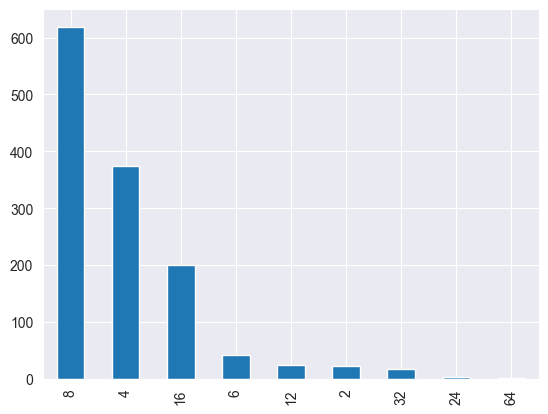

In [64]:
df['Ram'].value_counts().plot(kind='bar')

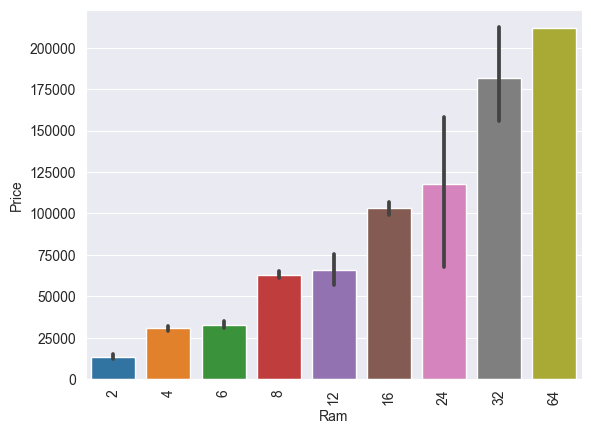

In [65]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

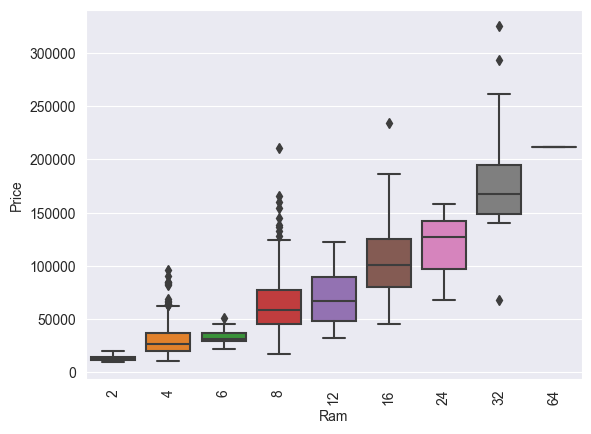

In [66]:
sns.boxplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [67]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [68]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

In [69]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          224
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1TB Hybrid                         9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [70]:
df["Memory"] = df["Memory"].str.replace('GB', '',regex=True)

In [71]:
df['Memory'].value_counts()

256 SSD                        412
1TB HDD                        224
500 HDD                        132
512 SSD                        118
128 SSD +  1TB HDD              94
128 SSD                         76
256 SSD +  1TB HDD              73
32 Flash Storage                38
2TB HDD                         16
64 Flash Storage                15
512 SSD +  1TB HDD              14
1TB SSD                         14
256 SSD +  2TB HDD              10
1TB Hybrid                       9
256 Flash Storage                8
16 Flash Storage                 7
32 SSD                           6
180 SSD                          5
128 Flash Storage                4
512 SSD +  2TB HDD               3
16 SSD                           3
512 Flash Storage                2
1TB SSD +  1TB HDD               2
256 SSD +  500 HDD               2
128 SSD +  2TB HDD               2
256 SSD +  256 SSD               2
512 SSD +  256 SSD               1
512 SSD +  512 SSD               1
64 Flash Storage +  

In [72]:
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [73]:
df['Memory'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [74]:
df["Memory"].str.split("+", n = 1, expand = True)

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [75]:
new=df["Memory"].str.split("+", n = 1, expand = True)

In [76]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()

In [77]:
df['first'].value_counts()

256 SSD              500
1000 HDD             225
128 SSD              172
512 SSD              138
500 HDD              132
32 Flash Storage      38
64 Flash Storage      16
2000 HDD              16
1000 SSD              16
1000 Hybrid            9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
240 SSD                1
8 SSD                  1
64 SSD                 1
128 HDD                1
32 HDD                 1
508 Hybrid             1
Name: first, dtype: int64

In [78]:
df["second"]= new[1]

In [79]:
df['second'].value_counts()

  1000 HDD       185
  2000 HDD        15
  256 SSD          3
  500 HDD          2
  1000 Hybrid      2
  512 SSD          1
Name: second, dtype: int64

In [80]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [81]:
df['first'].str.split().apply(lambda x:x[0])

0        128
1        128
2        256
3        512
4        256
        ... 
1298     128
1299     512
1300      64
1301    1000
1302     500
Name: first, Length: 1303, dtype: object

In [82]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None,0,1,0,0


In [83]:
df["second"].fillna("0", inplace = True)

In [84]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,0,1,0,0


In [85]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [86]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,0,1,0,0,0,0,0,0


In [87]:
df['second']=df['second'].str.split().apply(lambda x:x[0])

In [88]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,0,1,0,0,0,0,0,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Ram                  1303 non-null   int32  
 3   Memory               1303 non-null   object 
 4   Gpu                  1303 non-null   object 
 5   OpSys                1303 non-null   object 
 6   Weight               1303 non-null   float32
 7   Price                1303 non-null   float64
 8   Touchscreen          1303 non-null   int64  
 9   Ips                  1303 non-null   int64  
 10  ppi                  1303 non-null   float64
 11  Cpu brand            1303 non-null   object 
 12  first                1303 non-null   object 
 13  second               1303 non-null   object 
 14  Layer1HDD            1303 non-null   int64  
 15  Layer1SSD            1303 non-null   i

In [90]:
df['second'].unique()

array(['0', '1000', '256', '2000', '500', '512'], dtype=object)

In [91]:
df["first"] = df["first"].str.split().str[0].astype(int)
df["first"] = df["first"].astype(str)
import re

df["first"] = df["first"].apply(lambda x: re.findall(r"\d+", x)[0]).astype(int)


In [92]:
# Convert columns to numeric data type
df["first"] = pd.to_numeric(df["first"])
df["second"] = pd.to_numeric(df["second"])
df["Layer1HDD"] = pd.to_numeric(df["Layer1HDD"])
df["Layer2HDD"] = pd.to_numeric(df["Layer2HDD"])
df["Layer1SSD"] = pd.to_numeric(df["Layer1SSD"])
df["Layer2SSD"] = pd.to_numeric(df["Layer2SSD"])
df["Layer1Hybrid"] = pd.to_numeric(df["Layer1Hybrid"])
df["Layer2Hybrid"] = pd.to_numeric(df["Layer2Hybrid"])

# Perform arithmetic operations
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])


In [93]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,0,1,0,0,0,0,0,0,0,128,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0,1,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,1,0,0,0,0,0,0,0,256,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,0,1,0,0,0,0,0,0,0,512,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,0,1,0,0,0,0,0,0,0,256,0


In [94]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [95]:

df.sample()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid
528,Dell,Notebook,4,500 HDD,AMD Radeon R5 M430,Windows 10,2.3,31168.8,0,0,141.211998,Intel Core i5,500,0,0


In [96]:
df.drop(columns=['Memory'],inplace=True)

In [97]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0


In [98]:
import pandas as pd
import numpy as np

# Filter out non-numeric values in the 'Price' column
df = df[pd.to_numeric(df['Price'], errors='coerce', downcast='float').notna()]

# Convert the remaining values in the 'Price' column to numeric values with error handling
df['Price'] = pd.to_numeric(df['Price'], errors='coerce', downcast='float')

# Print rows with non-numeric values in the 'Price' column
non_numeric_rows = df[df['Price'].isna()]
print(non_numeric_rows)

# Calculate correlation
correlation = df.corr()['Price']


Empty DataFrame
Columns: [Company, TypeName, Ram, Gpu, OpSys, Weight, Price, Touchscreen, Ips, ppi, Cpu brand, HDD, SSD, Hybrid]
Index: []


C:\Users\Dell\AppData\Local\Temp\ipykernel_13068\883259243.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['Price']


In [99]:
df.drop(columns=['Hybrid'],inplace=True)

In [100]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [101]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [102]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [103]:

df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [104]:
df = df[df['Gpu brand'] != 'ARM']

In [105]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

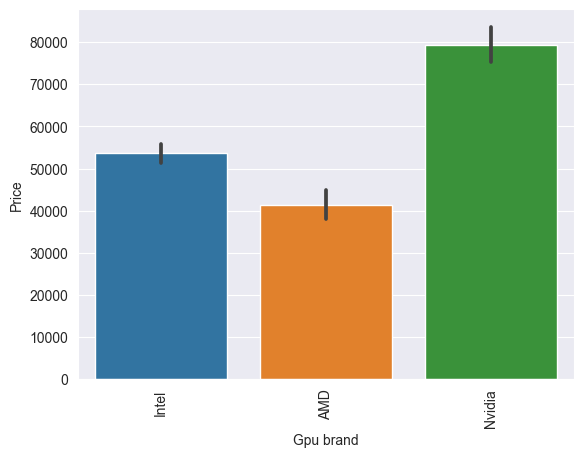

In [106]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

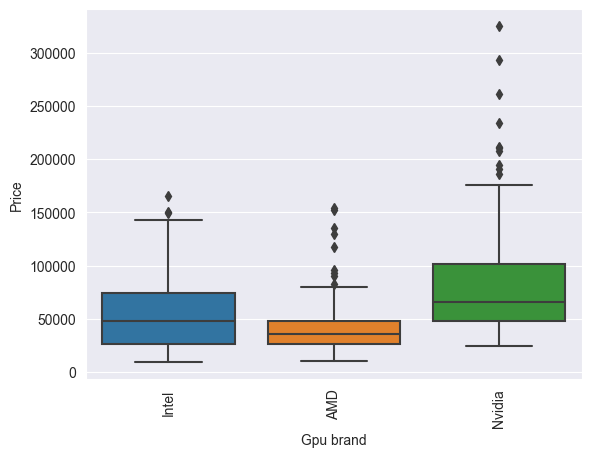

In [107]:
sns.boxplot(x=df['Gpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [108]:
df.drop(columns=['Gpu'],inplace=True)

In [109]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [110]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

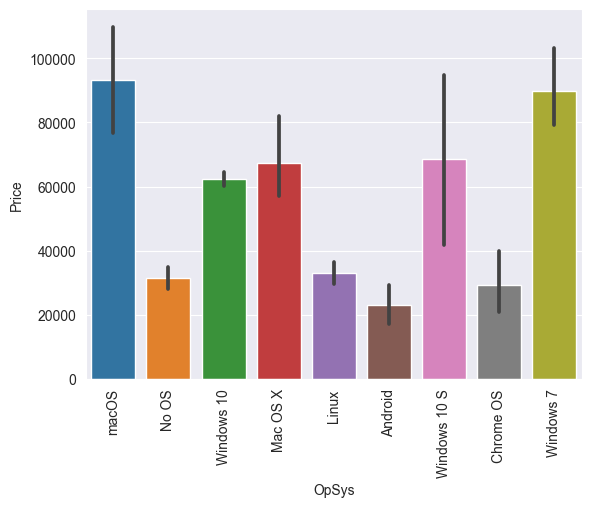

In [111]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

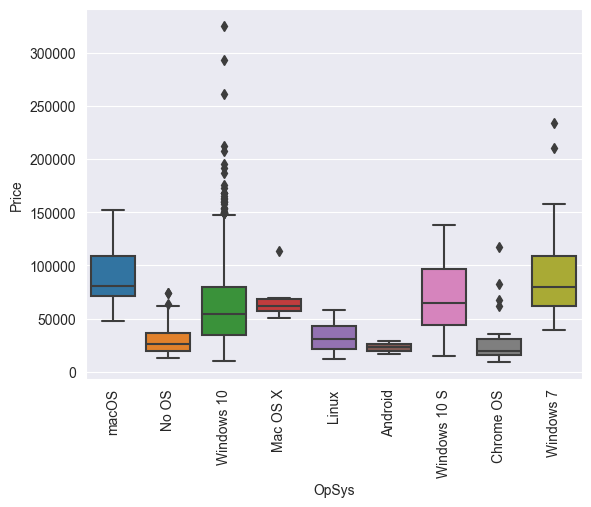

In [112]:
sns.boxplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [113]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [114]:
df['os'] = df['OpSys'].apply(cat_os)

In [115]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [116]:
df.drop(columns=['OpSys'],inplace=True)

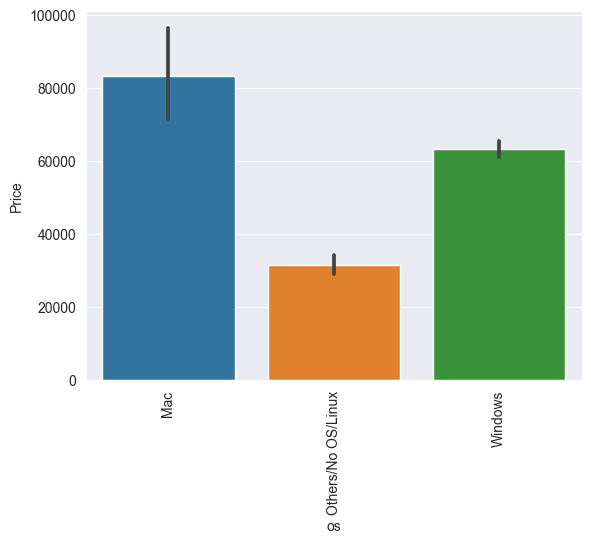

In [117]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

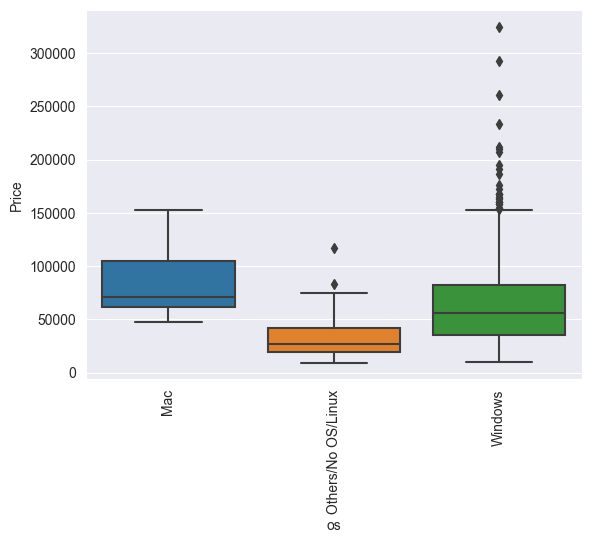

In [118]:
sns.boxplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13068\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

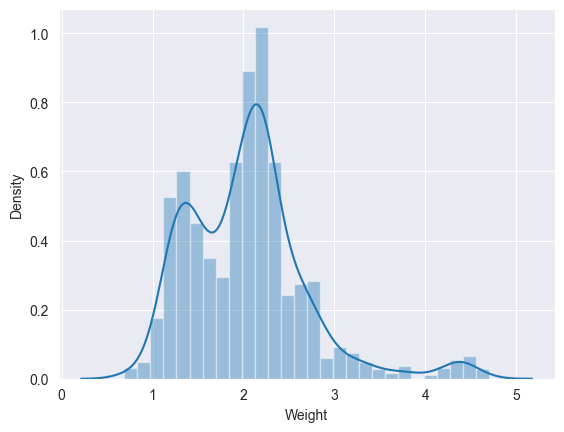

In [119]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

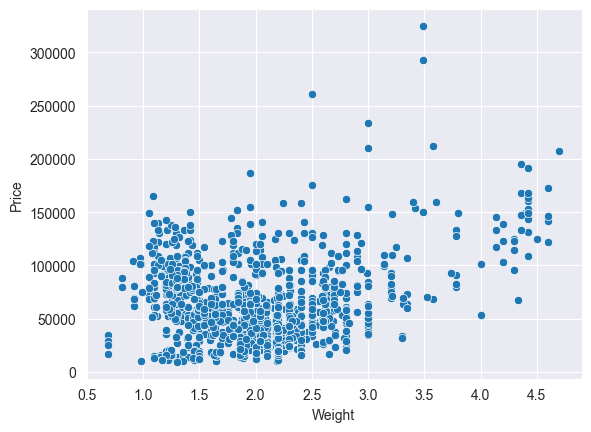

In [120]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [121]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price'])
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'].fillna(default_value, inplace=True)
df = df[df['Price'].apply(lambda x: isinstance(x, (int, float)))]


NameError: name 'default_value' is not defined

In [123]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original DataFrame
df_encoded = df.copy()

# Loop through each column in the DataFrame
for col in df_encoded.columns:
    # Check if the column has dtype 'object', indicating it's a categorical variable
    if df_encoded[col].dtype == 'object':
        # Create a label encoder object
        le = LabelEncoder()
        # Use the label encoder to transform the column
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Now you can calculate the correlation coefficient
correlation = df_encoded.corr()['Price']
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13068\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

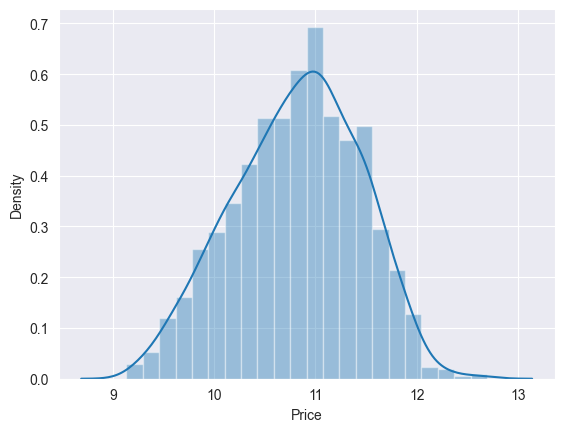

In [124]:
sns.distplot(np.log(df['Price']))

In [125]:
y = np.log(df['Price'])
X = df.drop(columns=['Price'])

In [126]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [127]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [130]:
X_train.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
147,Asus,Notebook,4,2.00,0,0,141.211998,Other Intel Processor,1000,0,Intel,Windows
342,HP,Notebook,8,2.10,0,1,141.211998,Intel Core i3,1000,0,Nvidia,Windows
1003,HP,Notebook,4,1.64,0,0,111.935204,Intel Core i5,500,0,Intel,Windows
814,Dell,Notebook,8,2.18,0,0,141.211998,Intel Core i5,0,256,AMD,Windows
344,Dell,Ultrabook,8,1.20,0,0,165.632118,Intel Core i7,0,256,Intel,Windows


In [131]:
X_train.shape

(1041, 12)

In [132]:
X_test.shape

(261, 12)

In [133]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [134]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   Ips          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


In [136]:
cat_columns=[i for i in df.columns if df[i].dtype=='object']
cat_columns

['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']

In [137]:
#one hot encoding on categorical columns
step1=ColumnTransformer(transformers=
    [('ohe',OneHotEncoder(sparse=True,handle_unknown='ignore',drop='first'),[0,1,7,10,11])]
    ,remainder='passthrough')
step2=LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
    ])
pipe.fit(X_train,y_train)

y_pred_train=pipe.predict(X_train)
y_pred_test=pipe.predict(X_test)
print("Training set score")
print('R2 score',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_train,y_pred_train))
print("Testing set score")
print('R2 score',r2_score(y_test,y_pred_test))
print('MAE',mean_absolute_error(y_test,y_pred_test))

C:\Users\Dell\Desktop\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training set score
R2 score 0.8357126045443424
MAE 0.19638364856813462
Testing set score
R2 score 0.8081332011066997
MAE 0.2146135429608021


In [138]:
np.exp(0.21)

1.2336780599567432

In [139]:
#one hot encoding on categorical columns
step1=ColumnTransformer(transformers=
    [('ohe',OneHotEncoder(sparse=True,handle_unknown='ignore',drop='first'),[0,1,7,10,11])]
    ,remainder='passthrough')
step2=Ridge()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
    ])
pipe.fit(X_train,y_train)

y_pred_train=pipe.predict(X_train)
y_pred_test=pipe.predict(X_test)
print("Training set score")
print('R2 score',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_train,y_pred_train))
print("Testing set score")
print('R2 score',r2_score(y_test,y_pred_test))
print('MAE',mean_absolute_error(y_test,y_pred_test))

C:\Users\Dell\Desktop\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training set score
R2 score 0.8349352069858695
MAE 0.19714623296579137
Testing set score
R2 score 0.8084899200931162
MAE 0.21474278545800035


In [140]:
#one hot encoding on categorical columns
step1=ColumnTransformer(transformers=
    [('ohe',OneHotEncoder(sparse=True,handle_unknown='ignore',drop='first'),[0,1,7,10,11])]
    ,remainder='passthrough')
step2=Lasso(alpha=0.001)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
    ])
pipe.fit(X_train,y_train)

y_pred_train=pipe.predict(X_train)
y_pred_test=pipe.predict(X_test)
print("Training set score")
print('R2 score',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_train,y_pred_train))
print("Testing set score")
print('R2 score',r2_score(y_test,y_pred_test))
print('MAE',mean_absolute_error(y_test,y_pred_test))

C:\Users\Dell\Desktop\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training set score
R2 score 0.8275626183860193
MAE 0.20300107043006863
Testing set score
R2 score 0.8056423346263877
MAE 0.21696654985400202


In [141]:
#one hot encoding on categorical columns
step1=ColumnTransformer(transformers=
    [('ohe',OneHotEncoder(sparse=True,handle_unknown='ignore',drop='first'),[0,1,7,10,11])]
    ,remainder='passthrough')
step2=RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
    ])
pipe.fit(X_train.values,y_train.values)

y_pred_train=pipe.predict(X_train)
y_pred_test=pipe.predict(X_test)
print("Training set score")
print('R2 score',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_train,y_pred_train))
print("Testing set score")
print('R2 score',r2_score(y_test,y_pred_test))
print('MAE',mean_absolute_error(y_test,y_pred_test))

C:\Users\Dell\Desktop\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training set score
R2 score 0.9516073421910798
MAE 0.10387594747274352
Testing set score
R2 score 0.8612552202433235
MAE 0.176266780841514


C:\Users\Dell\Desktop\venv\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
C:\Users\Dell\Desktop\venv\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [142]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [143]:
X.head(5)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [144]:
for i in cat_columns:
    print(f"unique values of {i}",df[i].unique())

unique values of Company ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
unique values of TypeName ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
unique values of Cpu brand ['Intel Core i5' 'Intel Core i7' 'AMD Processor' 'Intel Core i3'
 'Other Intel Processor']
unique values of Gpu brand ['Intel' 'AMD' 'Nvidia']
unique values of os ['Mac' 'Others/No OS/Linux' 'Windows']


In [145]:
df['HDD'].unique()

array([   0,  500, 1000, 2000,   32,  128], dtype=int64)

In [146]:
df['SSD'].unique()

array([ 128,    0,  256,  512,   32,   64, 1000, 1024,   16,  768,  180,
        240,    8], dtype=int64)

In [147]:
df['Weight'].max()

4.7

In [148]:
df['Weight'].min()

0.69

In [149]:
df.shape

(1302, 13)

In [150]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Define the columns to check for outliers
columns_to_check = ['Company', 'TypeName', 'Ram' ,'Price' ,'Touchscreen','Ips','ppi','Cpu brand	']  # Replace with the names of the columns to check for outliers

# Loop through each column and calculate Z-scores
outliers = {}
for column in columns_to_check:
    column_data = df[column]
    z_scores = (column_data - np.mean(column_data)) / np.std(column_data)
    potential_outliers = data[abs(z_scores) > 2]  # Adjust the Z-score threshold as needed
    outliers[column] = potential_outliers

    # Visualize the data and potential outliers using a scatter plot
    plt.scatter(data.index, column_data, color='blue', label='Data')
    plt.scatter(potential_outliers.index, potential_outliers[column], color='red', label='Potential Outliers')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'Outlier Detection using Z-score for {column}')
    plt.legend()
    plt.show()

# Print the potential outliers for each column
for column, potential_outliers in outliers.items():
    print(f'Potential Outliers for {column}:')
    print(potential_outliers)


TypeError: Could not convert AppleAppleHPAppleAppleAcerAppleAppleAsusAcerHPHPAppleDellAppleAppleDellAppleLenovoDellAsusLenovoHPDellHPDellAppleDellDellHPChuwiAsusHPDellAppleLenovoAcerDellHPHPAsusDellAsusAcerDellAppleLenovoAsusDellAsusLenovoAcerHPHPAcerDellHPAsusMSIAsusDellDellLenovoAsusHPAsusHPHPLenovoAsusMicrosoftDellDellMSIAcerAsusLenovoDellAcerHPDellAppleHPLenovoAcerDellHPHPAsusDellAsusAcerHPDellAsusAcerDellDellAsusHPHPHPDellHPMicrosoftHPLenovoAsusMSILenovoAsusDellLenovoHPDellHPHPDellAsusAsusAcerMSILenovoHPAcerHPHPAsusDellHPDellDellAcerAcerHPHPLenovoAsusLenovoHPAcerLenovoLenovoToshibaHPAsusHPAsusMSIAcerDellDellLenovoMSIHPHPLenovoAsusDellToshibaAsusAcerDellLenovoAcerMSIAcerDellAcerHPHuaweiHPLenovoToshibaHPDellAcerMSILenovoHPDellDellLenovoToshibaXiaomiDellDellLenovoAcerDellLenovoVeroXiaomiLenovoDellHPRazerHPHPHPDellLenovoAcerLenovoDellLenovoDellDellDellLenovoAcerAsusHPLenovoHuaweiDellLenovoHPDellDellDellLenovoToshibaHPDellAcerDellAsusAsusHPAsusHPLenovoDellAcerDellAcerAsusAsusAcerLenovoAsusAsusDellLenovoDellHPAsusHPAppleDellAsusAsusLenovoAcerDellHPHPMSILenovoDellLenovoHPDellDellDellAsusLenovoHPLenovoAppleAsusDellLenovoToshibaDellDellAcerLenovoLenovoLenovoDellLenovoLenovoAcerAcerLenovoAsusLenovoLenovoAcerAsusHPDellLenovoLenovoAcerDellLenovoAsusAsusAsusLenovoLenovoAsusLenovoHPToshibaLenovoHPLenovoDellMSIAcerAsusDellHPLenovoHPAcerHPLenovoAsusHPAcerLenovoAcerAsusHPDellMSIToshibaAsusLenovoAsusHPDellHPAsusDellDellLenovoHPLenovoDellLenovoHPDellAsusDellDellHPMSIHPToshibaDellLenovoDellDellDellHPAsusLenovoHPLenovoHPDellLenovoDellHPAsusAcerAsusLenovoDellHPLenovoDellAsusAcerHPLenovoAsusLenovoAsusLenovoLenovoDellDellLenovoAsusAsusAcerMSIDellHPLenovoLenovoDellLenovoLenovoAsusLenovoAcerMSIAsusToshibaDellLenovoLenovoLenovoLenovoHPAcerAsusDellDellHPDellLenovoLenovoChuwiHPAsusDellDellDellDellHPMediacomSamsungLenovoLenovoLenovoLenovoAsusHPGoogleLenovoAsusLenovoDellLenovoLenovoHPDellAcerDellMSIMicrosoftHPDellHPLenovoDellDellDellMicrosoftMicrosoftHPAcerAcerAsusLenovoLenovoAsusAcerDellHPLenovoHPHPGoogleDellAsusDellDellLenovoDellToshibaDellDellHPChuwiLenovoLenovoDellDellLenovoAsusLenovoToshibaAsusAcerAsusLenovoLenovoHPLenovoLenovoAsusHPLenovoLenovoLenovoLenovoAsusAcerHPLenovoDellAcerDellDellXiaomiAsusHPAsusHPAsusLenovoHPDellHPDellLenovoLenovoLenovoDellDellDellToshibaAsusMediacomAsusDellDellHPHPLenovoDellDellHPAcerAsusHPLenovoLenovoHPLenovoLenovoDellDellHPHPAsusMediacomLenovoHPDellAcerLenovoHPLenovoAsusDellDellFujitsuLenovoLenovoHPHPHPLenovoLenovoMediacomToshibaLenovoMSIDellMediacomDellHPDellDellMSIHPLenovoLenovoAsusAsusLenovoDellSamsungLenovoLenovoLenovoLenovoDellDellHPHPAcerMSIDellMSIToshibaLenovoLenovoAcerLenovoDellDellDellDellAsusDellHPMSIAcerHPLenovoDellFujitsuHPLenovoMediacomLenovoAsusDellAsusDellLenovoLenovoAsusAsusDellLenovoLenovoDellLenovoHPLenovoAsusAcerLenovoAcerRazerToshibaLenovoAsusAcerDellMSIHPToshibaDellDellLenovoDellDellLenovoLenovoHPMSIToshibaDellHPToshibaAcerMicrosoftLenovoLenovoLenovoHPMSIAsusHPLGAcerMSIAsusDellHPLenovoDellHPDellHPLenovoAcerLenovoHPLenovoToshibaAcerLenovoAsusToshibaHPDellLenovoLenovoLenovoLenovoDellAcerLenovoLenovoHPLenovoDellDellAsusDellLenovoDellLenovoMediacomHPLenovoHPLenovoDellMSILenovoDellDellDellHPAcerDellHPAcerLenovoLenovoHPDellMSIAcerDellDellToshibaLenovoLenovoAcerSamsungHPDellHPLenovoHPAsusLenovoAsusLenovoHPHPDellAcerLenovoDellGoogleAsusDellAcerAsusDellSamsungAcerDellSamsungToshibaDellHPAsusLenovoAcerRazerAsusDellAsusToshibaLenovoLenovoMSIMSILenovoAcerDellAsusVeroLenovoLenovoAppleLenovoAsusDellLenovoDellHPAsusDellDellDellHPToshibaHPDellLenovoHPMSISamsungDellDellLenovoRazerHPDellDellLenovoToshibaLenovoMSILenovoToshibaAsusDellAcerAcerRazerLenovoAsusLenovoLenovoDellAsusToshibaLenovoAsusAsusDellHPDellHPDellHPAsusHPHPHPAsusDellLenovoAsusDellAsusHPDellLenovoLenovoHPToshibaLenovoDellHPToshibaLenovoAcerDellLenovoLenovoToshibaLenovoSamsungDellAsusXiaomiDellHPHPHPAsusLenovoDellHPDellAsusAcerLenovoHPHPSamsungLenovoMSIToshibaDellHPDellDellDellAsusDellLenovoLenovoLGHPAcerLenovoLGDellHPLenovoHPAcerLenovoHPMSIDellMSIDellHPHPToshibaLenovoDellLenovoHPDellHPLenovoHPHPLenovoToshibaHPDellMSIDellDellHPAsusAcerToshibaLenovoLenovoDellLenovoDellAcerHPDellToshibaAsusLenovoDellDellHPDellAcerToshibaLenovoAcerToshibaHPDellDellHPDellLenovoDellDellDellToshibaAsusHPLenovoAsusHPAsusDellToshibaLenovoFujitsuToshibaDellHPLenovoDellDellHPHPLenovoLenovoDellAsusHPAcerAsusHPAcerHPDellHPToshibaHPHPHPHPHPDellHPHPHPHPToshibaHPLenovoToshibaHPDellToshibaHPHPDellHPHPHPDellHPHPAcerMSIHPHPHPHPToshibaDellHPLenovoVeroToshibaLenovoHPHPHPMSILenovoAsusLenovoHPDellHPDellHPHPAcerDellMSIHPAsusDellDellMSIDellAsusDellDellAppleDellHPHPHPLenovoLenovoLenovoMSILenovoHPLenovoLenovoLenovoHPDellHPHPLenovoHPAcerDellHPAsusDellHPAcerDellMSIHPAsusDellDellAcerHPLenovoDellMSILenovoHPAsusHPDellLenovoHPLenovoDellLenovoRazerToshibaAsusVeroHPHPDellAsusLenovoLenovoHPLenovoHPHPLenovoAsusHPAcerLenovoHPDellMSIHPLenovoMSIHPHPHPHPHPDellHPLenovoLenovoHPLenovoDellDellHPMSILenovoLenovoHPLenovoMSIHPLenovoHPDellLenovoLenovoHPMSIHPHPAsusLenovoLenovoAsusLenovoLenovoMSIHPLenovoLenovoDellAcerHPAsusDellAcerDellAcerLenovoHPAppleDellHPLenovoAsusAcerMSIDellLenovoDellDellAsusDellHPLenovoAcerAsusAppleAsusMSIDellAsusAcerAcerLenovoLenovoAcerLenovoMSIHPDellDellAsusDellDellLenovoMSILenovoRazerDellMSIAppleHPHPDellMSILenovoLenovoAsusAcerDellHPAsusDellAsusLenovoDellDellHPLenovoLenovoDellAsusAsusDellLenovoMSILenovoAsusDellAcerDellLenovoHPDellHPAsusLenovoLenovoLenovoHPAsusAsusDellAcerDellLenovoHPDellHPAsusLenovoLenovoLenovoHPAsusAsusDellAcerDellLenovoHPDellHPAsusLenovoLenovoLenovoHPAsus to numeric

In [153]:
import pickle

In [155]:
filename= 'trained_model.sav'
pickle.dump(RandomForestRegressor,open(filename,'wb'))

In [156]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))